In [1]:
import pandas as pd

In [2]:
df_clients = pd.read_excel('case.xlsx', sheet_name='clients')
df_stores = pd.read_excel('case.xlsx', sheet_name='stores')
df_products = pd.read_excel('case.xlsx', sheet_name='products')
df_sales = pd.read_excel('case.xlsx', sheet_name='sales')
df_payments = pd.read_excel('case.xlsx', sheet_name='payments')

# First Analysis

In [3]:
df_clients.sample(5)

,id,name,sex,birth_date
26,27,Enzo Costa,M,8/23/1988
221,222,Giovanna Cunha,F,7/26/1978
200,201,Matilde Cavalcanti,F,1/9/1986
492,493,Ryan Pereira,M,2/8/1950
965,966,Estevan Santos,M,11/11/1951


In [4]:
df_clients.head(5)

,id,name,sex,birth_date
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953


In [5]:
df_clients.tail(5)

,id,name,sex,birth_date
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994
999,1000,Gustavo Barbosa,M,12/30/1975


In [6]:
df_clients.isnull().sum()

id            0
name          4
sex           4
birth_date    4
dtype: int64

In [7]:
df_clients[df_clients.isnull().T.any()]

,id,name,sex,birth_date
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [8]:
df_clients.sex.unique()

array(['F', 'M', nan], dtype=object)

In [9]:
df_products

,id,product,value
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


<AxesSubplot:>

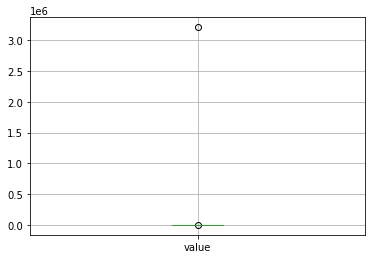

In [10]:
df_products.boxplot(column=['value'])

In [11]:
df_products[df_products.value > 300000]

,id,product,value
9,10,xxx-231a,3211352.0


<AxesSubplot:>

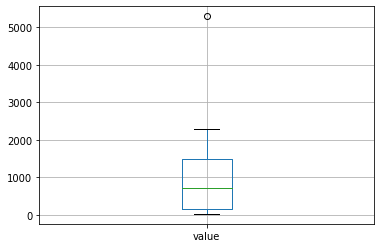

In [12]:
df_products[df_products.value < 300000].boxplot(column=['value'])

In [13]:
# discovering if that problematic product was sold
df_sales[df_sales.id_product==10].count()

id            182
id_cliente    182
id_store      182
id_product    182
dt_sale       182
dtype: int64

In [14]:
df_sales.isnull().sum()

id            0
id_cliente    0
id_store      0
id_product    0
dt_sale       0
dtype: int64

In [15]:
df_sales.describe()

,id,id_cliente,id_store,id_product
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,500.763667,4.538333,4.435000
std,866.169729,285.322282,2.922221,2.511018
min,1.000000,1.000000,1.000000,1.000000
25%,750.750000,254.750000,2.000000,3.000000
50%,1500.500000,503.500000,4.000000,3.000000
75%,2250.250000,742.000000,7.000000,6.000000
max,3000.000000,1000.000000,10.000000,10.000000


In [16]:
df_payments.isnull().sum()

id            0
id_sale       0
dt_payment    0
dtype: int64

In [17]:
df_payments.describe()

,id,id_sale
count,2072.000000,2072.000000
mean,1036.500000,1491.731660
std,598.279199,864.865583
min,1.000000,1.000000
25%,518.750000,746.250000
50%,1036.500000,1501.500000
75%,1554.250000,2220.500000
max,2072.000000,2997.000000


# Data Cleaning

## Null Data

In [18]:
df_clients[df_clients.name.isnull()]

,id,name,sex,birth_date
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN


In [19]:
df_clients[df_clients.birth_date.isnull()]

,id,name,sex,birth_date
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN


In [20]:
df_clients[df_clients.sex.isnull()]

,id,name,sex,birth_date
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [21]:
df_clients.loc[df_clients.name.isnull(), 'name'] = 'No Name'
df_clients.loc[df_clients.sex.isnull(), 'sex'] = 'O'
df_clients.loc[df_clients.birth_date.isnull(), 'birth_date'] = '1/1/2020'

In [22]:
df_clients.loc[[269,287], :]

,id,name,sex,birth_date
269,270,No Name,M,1/1/2020
287,288,Victor Ribeiro,O,12/17/1974


In [23]:
# Now we have no null datag
df_clients.isnull().sum()

id            0
name          0
sex           0
birth_date    0
dtype: int64

## Outliers

<AxesSubplot:>

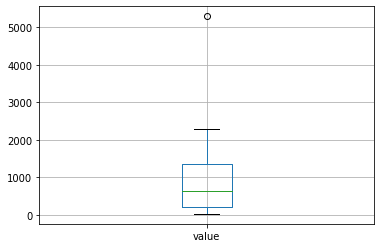

In [24]:
df_products.loc[9,'value'] = df_products.value[9] / 10000
df_products.boxplot(column=['value'])

## Consistency

In [25]:
df_sales[~df_sales.id_cliente.isin(df_clients.id)]

,id,id_cliente,id_store,id_product,dt_sale


In [26]:
df_sales[~df_sales.id_store.isin(df_stores.id)]

,id,id_cliente,id_store,id_product,dt_sale


In [27]:
df_sales[~df_sales.id_product.isin(df_products.id)]

,id,id_cliente,id_store,id_product,dt_sale


In [28]:
df_payments[~df_payments.id_sale.isin(df_sales.id)]

,id,id_sale,dt_payment


In [29]:
df_sales[~df_sales.id.isin(df_payments.id_sale)]

,id,id_cliente,id_store,id_product,dt_sale
3,4,59,4,3,2018-01-05
5,6,52,8,3,2018-01-05
20,21,270,2,10,2018-01-12
21,22,465,2,3,2018-01-12
32,33,459,2,7,2018-01-13
...,...,...,...,...,...
2992,2993,764,2,7,2020-09-25
2994,2995,6,2,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


## Duplicated Data

In [30]:
df_clients[df_clients.name.duplicated()]

,id,name,sex,birth_date
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [31]:
df_clients.drop('id', axis=1).duplicated().sum()

0

In [32]:
df_stores.city.duplicated().sum()

0

In [33]:
df_products['product'].duplicated().sum()

0

In [34]:
df_sales[df_sales.drop('id', axis=1).duplicated()]

,id,id_cliente,id_store,id_product,dt_sale
496,497,559,2,5,2018-06-22


In [35]:
df_sales[(df_sales.id_cliente==559) & (df_sales.id_store==2) & (df_sales.id_product==5)]

,id,id_cliente,id_store,id_product,dt_sale
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [36]:
df_payments.drop('id', axis=1).duplicated().sum()

0

## Data Formatting

In [37]:
df_clients.birth_date = pd.to_datetime(df_clients.birth_date, format='%m/%d/%Y')
df_clients.sample()

,id,name,sex,birth_date
229,230,Nicole Gomes,F,1995-05-04


In [38]:
df_payments.sample()

,id,id_sale,dt_payment
535,536,770,2018-09-29


In [39]:
df_products.sample()

,id,product,value
9,10,xxx-231a,321.1352


In [40]:
df_stores.sample()

,id,city
0,1,São Paulo


## Indexes

In [41]:
df_clients = df_clients.set_index('id')
df_stores = df_stores.set_index('id')
df_payments = df_payments.set_index('id')
df_products = df_products.set_index('id')
df_sales = df_sales.set_index('id')

# Data Fusion

In [42]:
df = df_sales.join(df_clients.add_prefix('client_'), on='id_cliente')
df = df.join(df_stores.add_prefix('store_'), on='id_store')
df = df.join(df_products.add_prefix('product_'), on='id_product')
df.sample()

,id_cliente,id_store,id_product,dt_sale,client_name,client_sex,client_birth_date,store_city,product_product,product_value
id,,,,,,,,,,
1988,2,2,10,2019-10-25,Caio Pereira,M,1978-04-16,Rio de Janeiro,xxx-231a,321.1352


In [43]:
df = df.join(df_payments.set_index('id_sale'))
df.sample()

,id_cliente,id_store,id_product,dt_sale,client_name,client_sex,client_birth_date,store_city,product_product,product_value,dt_payment
id,,,,,,,,,,,
316,944,6,3,2018-04-27,Igor Santos,M,1975-02-15,Recife,laptop básico,2300.0,2018-05-26


In [44]:
df.isnull().sum()

id_cliente             0
id_store               0
id_product             0
dt_sale                0
client_name            0
client_sex             0
client_birth_date      0
store_city             0
product_product        0
product_value          0
dt_payment           928
dtype: int64

# Feature Engineering

In [45]:
df['paid'] = 1
df.loc[df.dt_payment.isnull(), 'paid'] = 0
df

,id_cliente,id_store,id_product,dt_sale,client_name,client_sex,client_birth_date,store_city,product_product,product_value,dt_payment,paid
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


In [46]:
df['days_to_pay'] = (df.dt_payment - df.dt_sale).dt.days
df

,id_cliente,id_store,id_product,dt_sale,client_name,client_sex,client_birth_date,store_city,product_product,product_value,dt_payment,paid,days_to_pay
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


In [55]:
import numpy as np
df['client_age'] = np.floor((pd.to_datetime('today') - df.client_birth_date)/np.timedelta64(1, 'Y'))
df

,id_cliente,id_store,id_product,dt_sale,client_name,client_sex,client_birth_date,store_city,product_product,product_value,dt_payment,paid,days_to_pay,client_age
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,71.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,49.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,58.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,79.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,21.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,27.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,34.0
